In [149]:
import preprocessingFuncts as pp
import pandas
import matplotlib.pyplot as plt
import numpy as np

<h3>Reading the ratings data</h3>
Returns a pandas data frame with cleaned data from u.data

In [150]:
ratings = pp.readRatingData()
ratings = ratings.sort_values(by=['user_id','item_id']).reset_index().drop('index',axis=1)
ratings

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
99995,943,1067,2
99996,943,1074,4
99997,943,1188,3
99998,943,1228,3


<h3>Reading the item data</h3>
Returns a pandas data frame with cleaned data from u.item (no title, sry, thought it's not important)

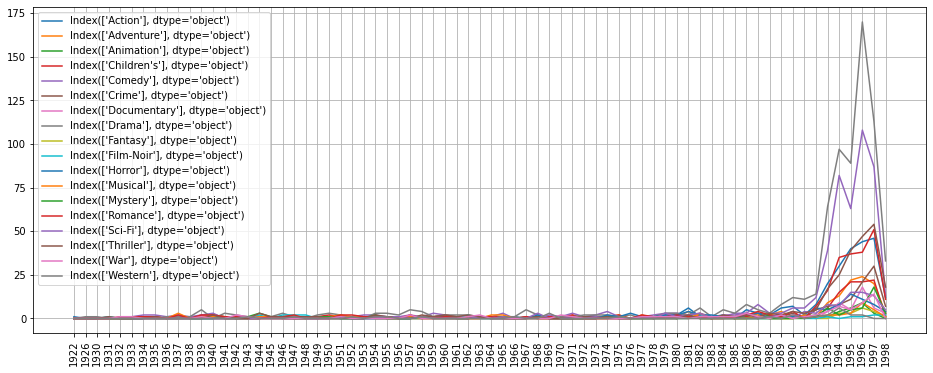

In [151]:
items = pp.readItemData()
items = items.sort_values(by=['year','item_id']).reset_index().drop('index',axis=1)
items = items.dropna()

# print(items.columns)
count=0
yearnow=0
for i in range(len(items)):
    if(yearnow!=items['year'][i]):
        count+=1
        yearnow=items['year'][i]

items = items.drop('item_id',axis=1)

plt.figure(figsize=(16,6))
for i in range(2,len(items.columns)):
    columnname = items.iloc[:,i].name
    temp3 = items.loc[:,['year',columnname]]
    temp3 = temp3.groupby(by=['year']).sum()

    plt.title(label=temp3.columns.name,fontsize=40,loc='center')
    plt.plot(temp3.index,temp3.iloc[:,0],label = temp3.columns)
    plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()


<h3>Reading the user data</h3>
Returns a pandas data frame with cleaned data from u.user. Occupation and gender column's contents are now nominal.

In [152]:
users = pp.readUserData()
users = users.sort_values(by=['user_id','age']).reset_index().drop('index',axis=1)
users

,user_id,age,gender,occupation,zip_code,age_category
0,1,24,1,19,85711,3
1,2,53,0,13,94043,6
2,3,23,1,20,32067,3
3,4,24,1,19,43537,3
4,5,33,0,13,15213,4
...,...,...,...,...,...,...
938,939,26,0,18,33319,3
939,940,32,1,0,02215,4
940,941,20,1,18,97229,2
941,942,48,0,10,78209,5


In [206]:
occup = pp.specifyByUserData(users, ratings, ["occupation"])
occup = occup.drop('user_id',axis=1)
occup = occup.groupby(by=['occupation','item_id']).mean()

sim = occup.pivot_table(columns='occupation',index='item_id',values='rating')
arr = []
for i in sim.columns:
    arr.append(sim.corrwith(sim[i]).tolist())

# for i in range(len(arr)):
#     plt.matshow(range(0,1),arr[i])


<h3>Specifying data to analyze based on user</h3>
Returns a pandas data frame with the user_id, item_id, rating and any specified category from the user attributes. takes input from user data and ratings data

In [ ]:
pp.specifyByUserData(users, ratings, ["gender"]).head()

,user_id,gender,item_id,rating
0,1,1,1,5
1,1,1,2,3
2,1,1,3,4
3,1,1,4,3
4,1,1,5,3


<h3>Specifying data to analyze based on item</h3>
Returns a pandas data frame with the item_id, item_id, rating and any specified category(only between "year" and "genre") from the item attributes, takes input from user data and ratings data

In [ ]:
pp.specifyByItemData(items, ratings, "year").head()

AttributeError: 'int' object has no attribute 'head'